Tree: 0.0255 (error) = 0.0003 (bias^2)  + 0.0152 (var) + 0.0098 (noise)
Bagging(Tree): 0.0196 (error) = 0.0004 (bias^2)  + 0.0092 (var) + 0.0098 (noise)


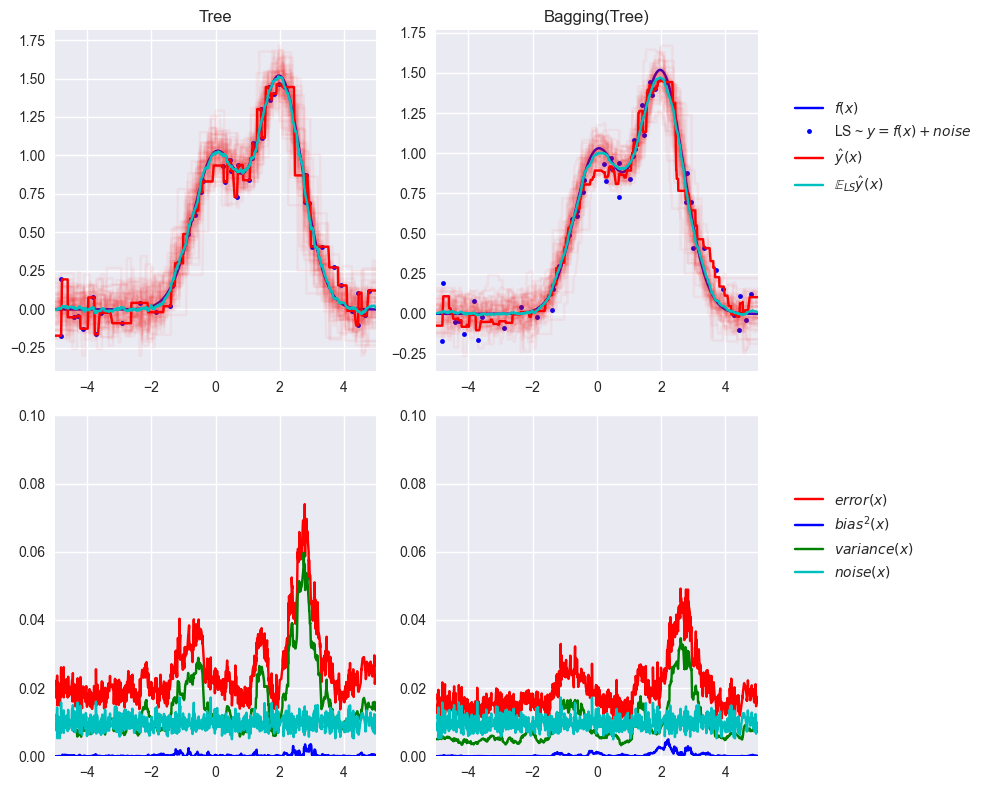

In [2]:
# 导入操作系统库
import os
# 更改工作目录
os.chdir(r"D:\softwares\applied statistics\pythoncodelearning\chap6\sourcecode")
# 导入基础计算库
import numpy as np
# 导入绘图库
import matplotlib.pyplot as plt
# 导入bagging回归器
from sklearn.ensemble import BaggingRegressor
# 导入决策树回归
from sklearn.tree import DecisionTreeRegressor
# 导入绘图库中的字体管理包
from matplotlib import font_manager
# 实现中文字符正常显示
font = font_manager.FontProperties(fname=r"C:\Windows\Fonts\SimKai.ttf")
# 使用seaborn风格绘图
plt.style.use("seaborn-v0_8")
# 计算期望的迭代次数
n_repeat = 50
# 训练集样本量
n_train = 50
# 测试集样本量
n_test = 1000
# 标准差
noise = 0.1
np.random.seed(0)
# 构造模型
estimators = [
    ("Tree", DecisionTreeRegressor()),
    ("Bagging(Tree)", BaggingRegressor(DecisionTreeRegressor())),
]
# 回归器的长度
n_estimators = len(estimators)
# 生成x数据
def f(x):
    x = x.ravel()
    return np.exp(-(x**2)) + 1.5 * np.exp(-((x - 2) ** 2))
# 生成XY数据
def generate(n_samples, noise, n_repeat=1):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X)
    if n_repeat == 1:
        y = f(X) + np.random.normal(0.0, noise, n_samples)
    else:
        y = np.zeros((n_samples, n_repeat))

        for i in range(n_repeat):
            y[:, i] = f(X) + np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))
    return X, y
# 训练集列表
X_train = []
y_train = []
# 多个训练集
for i in range(n_repeat):
    X, y = generate(n_samples=n_train, noise=noise)
    X_train.append(X)
    y_train.append(y)
# 生成一个测试集
X_test, y_test = generate(n_samples=n_test, noise=noise, n_repeat=n_repeat)
# 开始绘图
fig, axs = plt.subplots(2, 2, figsize=(10, 8), tight_layout=True)
for n, (name, estimator) in enumerate(estimators):
    # 初始化预测值
    y_predict = np.zeros((n_test, n_repeat))
    for i in range(n_repeat):
        # 模型拟合
        estimator.fit(X_train[i], y_train[i])
        # 模型预测
        y_predict[:, i] = estimator.predict(X_test)
    # 误差分解，初始化误差值
    y_error = np.zeros(n_test)
    for i in range(n_repeat):
        for j in range(n_repeat):
            # 计算预测值和真实值之间的误差
            y_error += (y_test[:, j] - y_predict[:, i]) ** 2
    # rescale一下
    y_error /= n_repeat * n_repeat
    # test数据集的噪声，方差
    y_noise = np.var(y_test, axis=1)
    # 偏差平方和
    y_bias = (f(X_test) - np.mean(y_predict, axis=1)) ** 2
    # 预测值的方差
    y_var = np.var(y_predict, axis=1)
    print(
        "{0}: {1:.4f} (error) = {2:.4f} (bias^2) "
        " + {3:.4f} (var) + {4:.4f} (noise)".format(
            name, np.mean(y_error), np.mean(y_bias), 
            np.mean(y_var), np.mean(y_noise)
        )
    )
    # Plot figures
    ax1=axs.flatten()[n]
    # 绘制测试集的真实值，无噪声
    ax1.plot(X_test, f(X_test), "b", label="$f(x)$")
    # 绘制训练集散点图，有噪声
    ax1.plot(X_train[0], y_train[0], ".b", label="LS ~ $y = f(x)+noise$")

    for i in range(n_repeat):
        if i == 0:
            # 测试集上的预测值
            ax1.plot(X_test, y_predict[:, i], "r", label=r"$\^y(x)$")
        else:
            # 测试集上的预测值
            ax1.plot(X_test, y_predict[:, i], "r", alpha=0.05)
    # 测试集上的预测值的均值
    ax1.plot(X_test, np.mean(y_predict, axis=1), "c", label=r"$\mathbb{E}_{LS} \^y(x)$")
    ax1.set_xlim([-5, 5])
    ax1.set_title(name)
    if n == n_estimators - 1:
        ax1.legend(loc=(1.1, 0.5))

    ax2 = axs.flatten()[n_estimators + n]
    # 测试集上的误差，偏差，方差，噪声
    ax2.plot(X_test, y_error, "r", label="$error(x)$")
    ax2.plot(X_test, y_bias, "b", label="$bias^2(x)$"),
    ax2.plot(X_test, y_var, "g", label="$variance(x)$"),
    ax2.plot(X_test, y_noise, "c", label="$noise(x)$")
    ax2.set_xlim([-5, 5])
    ax2.set_ylim([0, 0.1])
    if n == n_estimators - 1:
        ax2.legend(loc=(1.1, 0.5))

plt.show()
fig.savefig("../codeimage/code1.pdf")
